Importing Libraries


In [1]:
pip install missingno

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install warnings 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement warnings (from versions: none)
ERROR: No matching distribution found for warnings


In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import missingno as msno 
import warnings

warnings.filterwarnings('ignore')
sns.set()
plt.style.use('ggplot')


In [4]:
data = pd.read_csv('breast-cancer.csv')

In [5]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Preprocessing

In [6]:
data.drop(['id'], axis = 1, inplace = True)

In [7]:
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [8]:
data['diagnosis'] = data['diagnosis'].apply(lambda val: 1 if val == 'M' else 0 )

In [9]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [12]:
data.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

<Axes: >

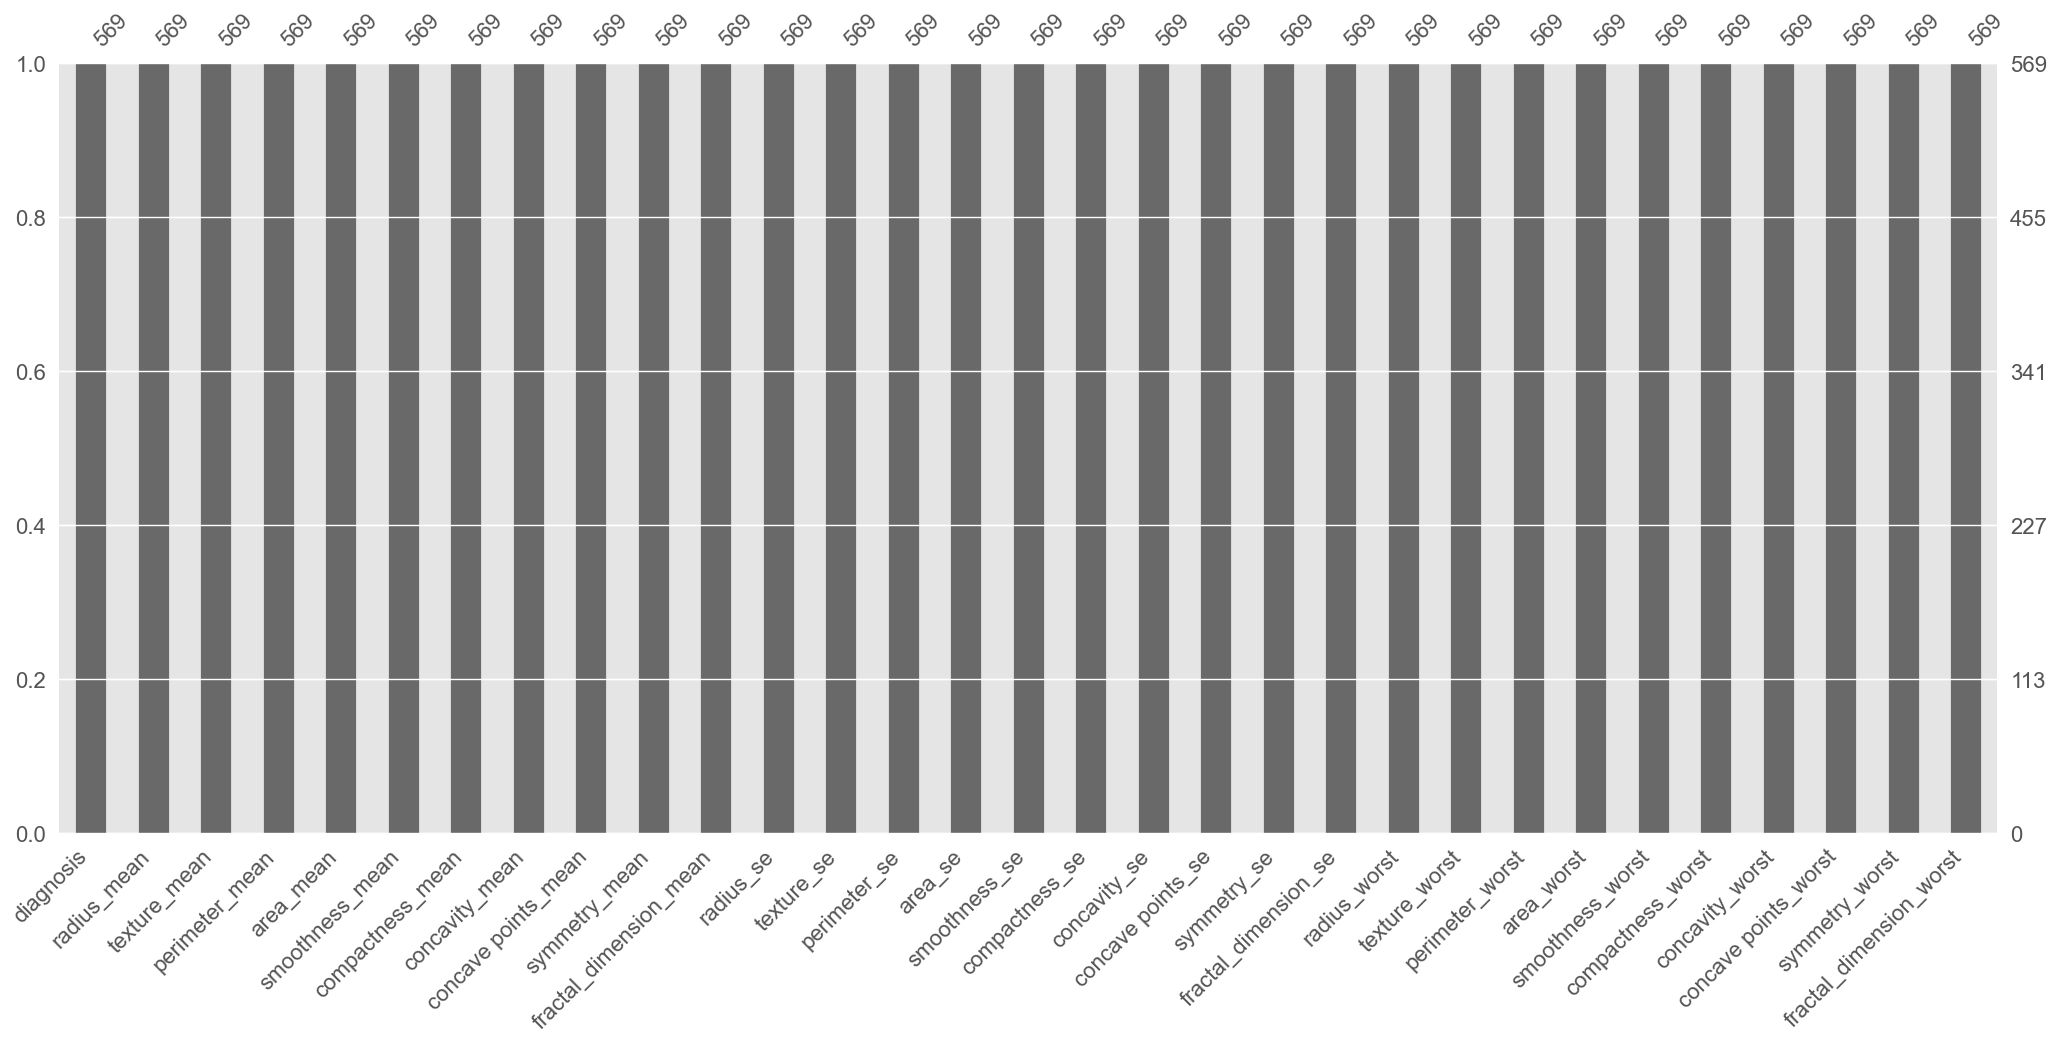

In [13]:
msno.bar(data)

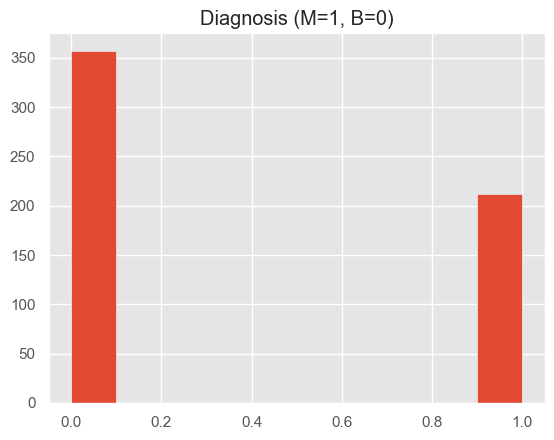

In [14]:
data.describe()
plt.hist(data['diagnosis'])
plt.title('Diagnosis (M=1, B=0)')
plt.show()

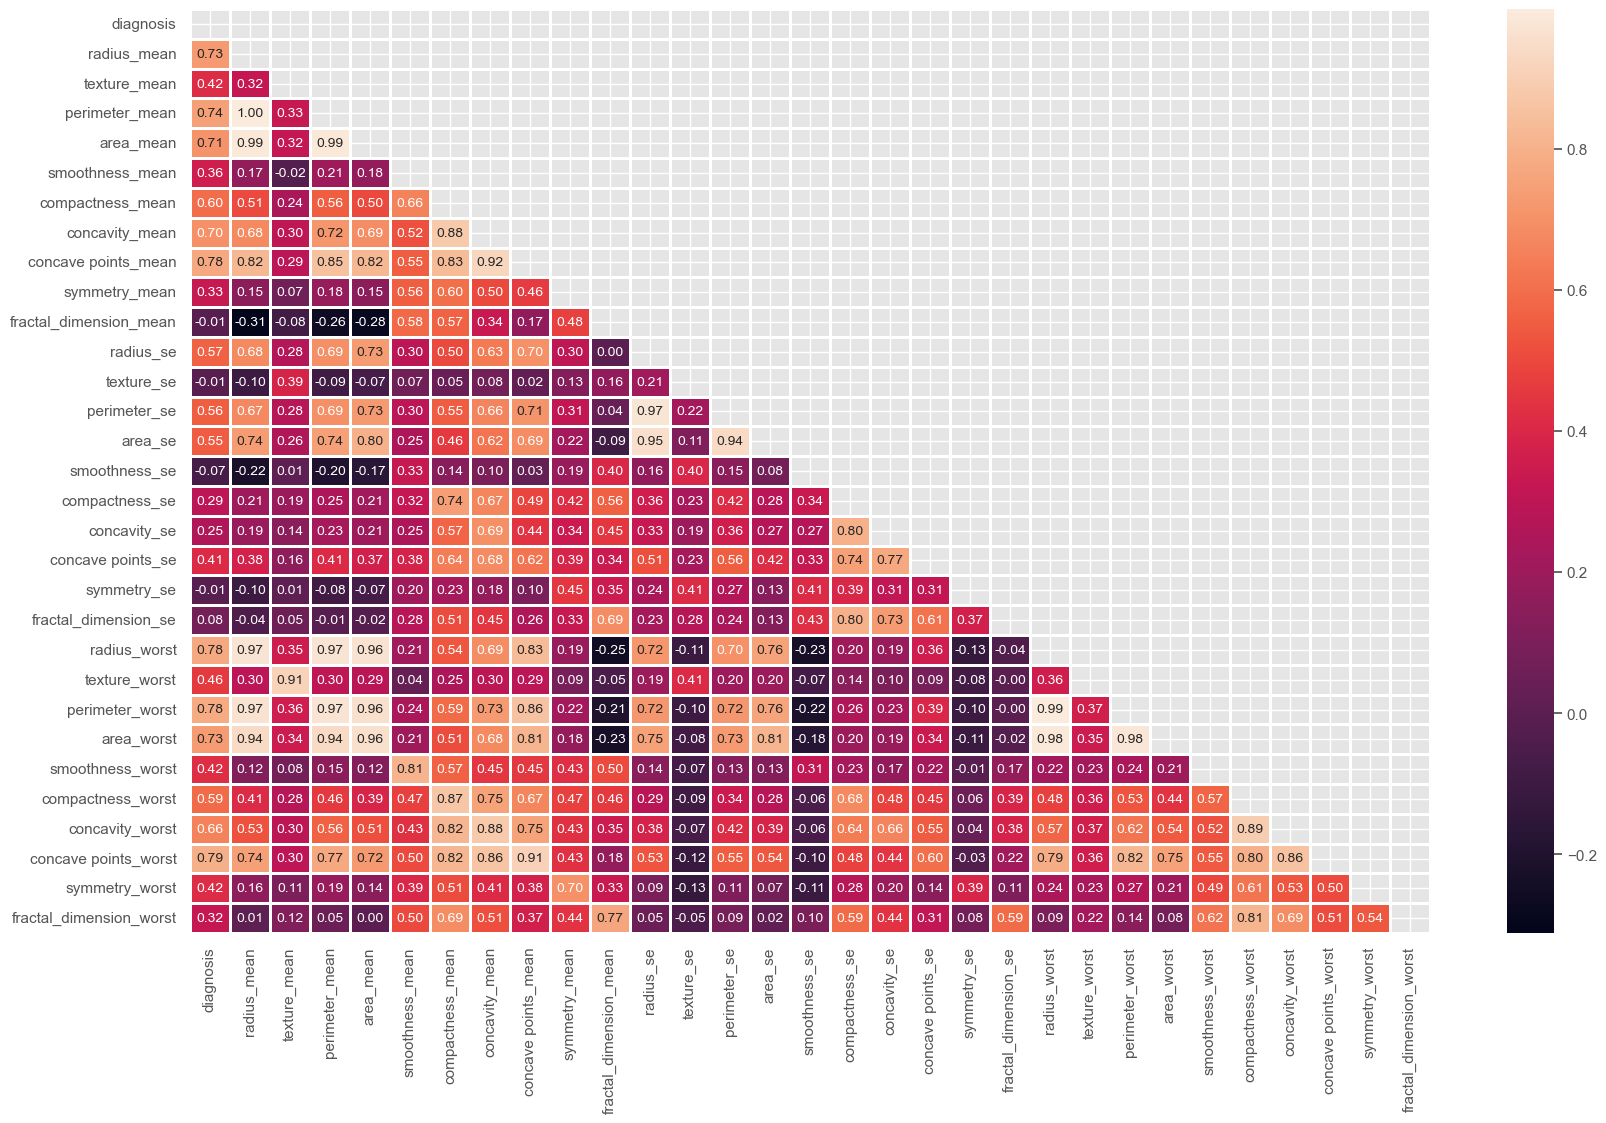

In [15]:
plt.figure(figsize = (20, 12))
correlation = data.corr()
mask = np.triu(np.ones_like(correlation, dtype = bool))
sns.heatmap(correlation, mask = mask, linewidths = 1, annot = True, fmt= ".2f")
plt.show()

In [16]:
corr_matrix = data.corr().abs() 

mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
tri_data = corr_matrix.mask(mask)

to_drop = [x for x in tri_data.columns if any(tri_data[x] > 0.92)]

data = data.drop(to_drop, axis = 1)

print(f"The reduced dataframe has {data.shape[1]} columns.")

The reduced dataframe has 23 columns.


In [17]:
to_drop

['radius_mean',
 'perimeter_mean',
 'area_mean',
 'concavity_mean',
 'radius_se',
 'perimeter_se',
 'radius_worst',
 'perimeter_worst']

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   texture_mean             569 non-null    float64
 2   smoothness_mean          569 non-null    float64
 3   compactness_mean         569 non-null    float64
 4   concave points_mean      569 non-null    float64
 5   symmetry_mean            569 non-null    float64
 6   fractal_dimension_mean   569 non-null    float64
 7   texture_se               569 non-null    float64
 8   area_se                  569 non-null    float64
 9   smoothness_se            569 non-null    float64
 10  compactness_se           569 non-null    float64
 11  concavity_se             569 non-null    float64
 12  concave points_se        569 non-null    float64
 13  symmetry_se              569 non-null    float64
 14  fractal_dimension_se     5

In [19]:
data.rename(columns={'concave points_mean': 'concave_points_mean','concave points_se':'concave_points_se',' concave points_worst ':' concave_points_worst '}, inplace=True)


In [20]:
data.columns

Index(['diagnosis', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'texture_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'texture_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [21]:
data.head()

,diagnosis,texture_mean,smoothness_mean,compactness_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,...,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,10.38,0.11840,0.27760,0.14710,0.2419,0.07871,0.9053,153.40,0.006399,...,0.03003,0.006193,17.33,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,17.77,0.08474,0.07864,0.07017,0.1812,0.05667,0.7339,74.08,0.005225,...,0.01389,0.003532,23.41,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,21.25,0.10960,0.15990,0.12790,0.2069,0.05999,0.7869,94.03,0.006150,...,0.02250,0.004571,25.53,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,20.38,0.14250,0.28390,0.10520,0.2597,0.09744,1.1560,27.23,0.009110,...,0.05963,0.009208,26.50,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,14.34,0.10030,0.13280,0.10430,0.1809,0.05883,0.7813,94.44,0.011490,...,0.01756,0.005115,16.67,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [22]:
data.tail()

,diagnosis,texture_mean,smoothness_mean,compactness_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,...,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,1,22.39,0.11100,0.11590,0.13890,0.1726,0.05623,1.256,158.70,0.010300,...,0.01114,0.004239,26.40,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,28.25,0.09780,0.10340,0.09791,0.1752,0.05533,2.463,99.04,0.005769,...,0.01898,0.002498,38.25,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,28.08,0.08455,0.10230,0.05302,0.1590,0.05648,1.075,48.55,0.005903,...,0.01318,0.003892,34.12,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,29.33,0.11780,0.27700,0.15200,0.2397,0.07016,1.595,86.22,0.006522,...,0.02324,0.006185,39.42,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,0,24.54,0.05263,0.04362,0.00000,0.1587,0.05884,1.428,19.15,0.007189,...,0.02676,0.002783,30.37,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [23]:
X = data.drop('diagnosis', axis = 1)
y = data['diagnosis']

In [24]:
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#X = scaler.fit_transform(X)

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [26]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

svc = SVC(probability=True)
parameters = {
    'gamma' : [0.0001, 0.001, 0.01, 0.1],
    'C' : [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20]
}

grid_search = GridSearchCV(svc, parameters)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [27]:
grid_search.best_params_

{'C': 15, 'gamma': 0.0001}

In [28]:
grid_search.best_score_

0.9222151898734177

In [29]:
svc = SVC(C=15,gamma=0.0001,kernel='linear')
svc.fit(X_train, y_train)

SVC(C=15, gamma=0.0001, kernel='linear')

In [30]:
y_pred = svc.predict(X_test)

In [31]:
print(accuracy_score(y_train, svc.predict(X_train)))

svc_acc = accuracy_score(y_test, svc.predict(X_test))
print(svc_acc)

0.9723618090452262
0.9649122807017544


In [32]:
print(confusion_matrix(y_test, y_pred))

[[104   4]
 [  2  61]]


In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       108
           1       0.94      0.97      0.95        63

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



In [34]:
import joblib
joblib.dump(svc , 'breast_cancer.pkl')

['breast_cancer.pkl']

In [36]:
X_test.head().T

,512,457,439,298,37
texture_mean,20.520000,25.250000,15.660000,18.170000,18.420000
smoothness_mean,0.110600,0.087910,0.079660,0.065760,0.089830
compactness_mean,0.146900,0.052050,0.055810,0.052200,0.037660
concave_points_mean,0.081720,0.020680,0.026520,0.013740,0.029230
symmetry_mean,0.211600,0.161900,0.158900,0.163500,0.146700
fractal_dimension_mean,0.073250,0.055840,0.055860,0.055860,0.058630
texture_se,0.930600,1.350000,0.654900,0.669000,2.342000
area_se,33.670000,17.580000,19.250000,20.560000,14.160000
smoothness_se,0.005414,0.005768,0.004837,0.003169,0.004352
compactness_se,0.022650,0.008082,0.009238,0.013770,0.004899


In [37]:
y_test.head().T

512    1
457    0
439    0
298    0
37     0
Name: diagnosis, dtype: int64